# Ford GoBike System Data
## by Arwa Fahad

## Investigation Overview

> In this investigation, I wanted to look at the characteristics and relations that effect the number of rides that have been ridden in 2017.

## Dataset Overview

> The data consists of information regarding 520,000 round-cut diamonds, including
bike_id, member_gender, user_type, duration_sec, and other features.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Gender vs. Rides number

> Here we show the strong relation between male and rides number, where we see that most trips have been ridden by male.  

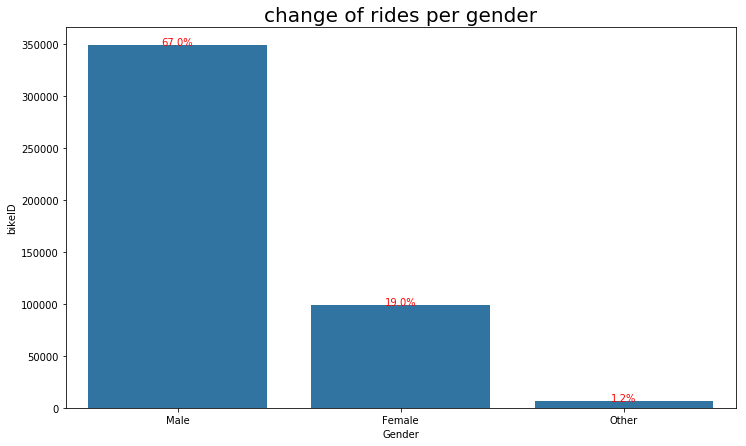

In [4]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.countplot(data = df, x = 'member_gender', color = base_color)

n_points = df.shape[0]
cat_counts = df['member_gender'].value_counts();
locs, labels = plt.xticks();

for loc, label in zip(locs, labels):
    
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r')
    
    
plt.title('change of rides per gender', fontsize=20)
plt.xlabel('Gender')
plt.ylabel('bikeID')
plt.show()

## Month vs. Rides number

> Here we show the strong relation between weekdays and rides number, we see that most trips are in weekdays witch till us that is the best for majority to take a trip in, rather than in weekends.

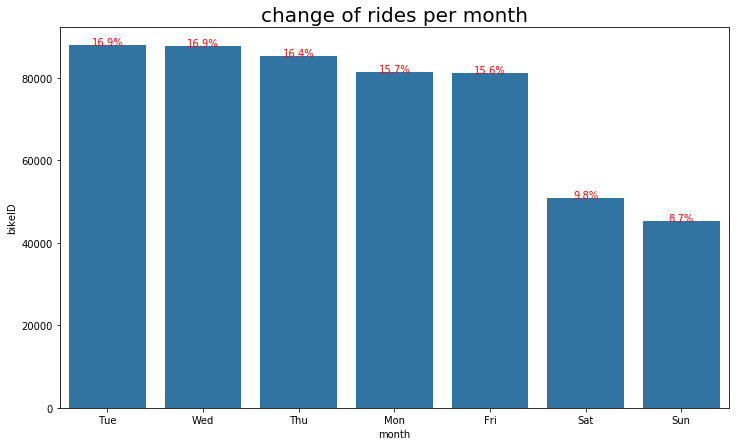

In [10]:
df['start_time'] = pd.to_datetime(df.start_time)
df['start_time_DAY']=df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
base_color = sb.color_palette()[0]
dayscount= df['start_time_DAY'].value_counts()
orderr =dayscount.index
plt.figure(figsize=(12,7))
sb.countplot(data = df, x = 'start_time_DAY', color = base_color, order = orderr )

n_points = df.shape[0]
cat_counts = df['start_time_DAY'].value_counts();
locs, labels = plt.xticks();

for loc, label in zip(locs, labels):
    
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r')
    

plt.title('change of rides per month', fontsize=20)
plt.xlabel('month')
plt.ylabel('bikeID')
plt.show()

## Hour vs. Rides number

> Here we show the most prefferd times for people to take a trip, we see that 8am and 5pm is the bset times for majority.

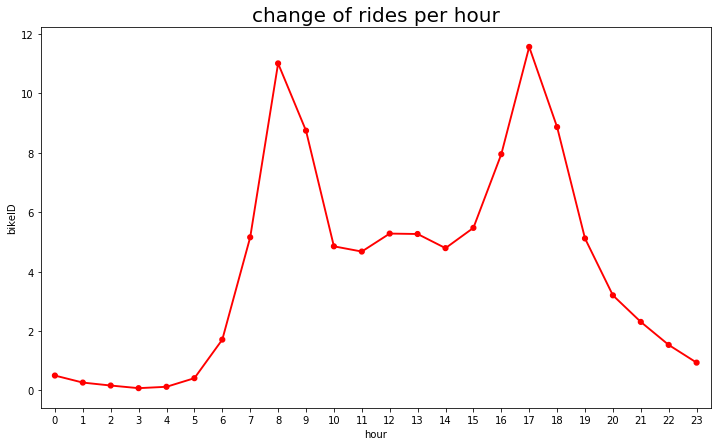

In [11]:
df['start_time_hour']=df['start_time'].dt.hour
hour_df = df.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()
hour_df['bike_id'] = (hour_df['bike_id']/hour_df['bike_id'].sum())*100
plt.figure(figsize=(12,7))
sb.pointplot(x='start_time_hour', y='bike_id', scale=.7, color='red', data=hour_df)


plt.title('change of rides per hour', fontsize=20)
plt.xlabel('hour')
plt.ylabel('bikeID')
plt.show()